In [45]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo o arquivo
df = pd.read_csv('crime.csv')

print(df.shape)

df.head(10)

(7846809, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
5,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
6,10224881,HY411873,09/03/2015 06:00:00 PM,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,4.0,39.0,14,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)"
7,11230640,JB152083,12/04/2017 12:00:00 AM,035XX S MICHIGAN AVE,4650,OTHER OFFENSE,SEX OFFENDER: FAIL TO REGISTER,GOVERNMENT BUILDING/PROPERTY,True,False,...,3.0,35.0,26,NaN,NaN,2017,04/12/2018 03:55:17 PM,NaN,NaN,NaN
8,11645648,JC212959,01/01/2018 08:00:00 AM,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,30.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
9,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN


### Limpando a Base de Dados

In [3]:
#-Dropando valores nulos
df = df.dropna(how='any')

#-Dropando colunas as quais não vamos analisar
df = df.drop(columns=['Date', 'IUCR', 'Beat', 'ID', 'Ward', 'Updated On', 'X Coordinate', 'Y Coordinate',
                      'Case Number', 'Community Area', 'Latitude', 'Longitude', 'FBI Code'])

#-Visualizando a tabela
df.head(10)

,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Location
6,044XX S UNIVERSITY AVE,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2015,"(41.81399924, -87.598137918)"
11,007XX W IRVING PARK RD,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,19.0,2015,"(41.954584472, -87.648375776)"
15,047XX S STATE ST,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,False,False,2.0,2015,"(41.80852139, -87.62606631)"
17,002XX N ST LOUIS AVE,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,11.0,2015,"(41.885759278, -87.713588042)"
23,013XX W ADDISON ST,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,SIDEWALK,True,False,19.0,2015,"(41.947099832, -87.662115668)"
27,071XX S CENTRAL PARK AVE,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE-GARAGE,False,False,8.0,2015,"(41.763557981, -87.712800734)"
31,059XX S KOLIN AVE,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,8.0,2015,"(41.784983382, -87.731495823)"
41,059XX N GLENWOOD AVE,THEFT,$500 AND UNDER,PARK PROPERTY,False,False,20.0,2015,"(41.989243623, -87.665119726)"
70,088XX S BURLEY AVE,CRIMINAL TRESPASS,TO STATE SUP LAND,CHA PARKING LOT/GROUNDS,True,False,4.0,2015,"(41.734847232, -87.545777045)"
73,011XX S MASON AVE,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,ALLEY,False,False,15.0,2015,"(41.866475734, -87.772933914)"


### Determinando as Informações sobre o Conjunto de Dados

In [4]:
lines, columns = df.shape

print(f"O tamanho da base de dados remanescente é:\nLinhas: {lines}.\nColunas: {columns}.")

O tamanho da base de dados remanescente é:
Linhas: 7145092.
Colunas: 9.


### Analisando o Conjunto de Dados

In [5]:
df.describe(include='all')

,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Location
count,7145092,7145092,7145092,7145092,7145092,7145092,7.145092e+06,7.145092e+06,7145092
unique,37606,35,542,217,2,2,NaN,NaN,674604
top,001XX N STATE ST,THEFT,SIMPLE,STREET,False,False,NaN,NaN,"(41.976290414, -87.905227221)"
freq,14302,1512295,790866,1843469,5303959,6140761,NaN,NaN,13845
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.128389e+01,2.010777e+03,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6.948255e+00,6.022115e+00,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.001000e+03,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+00,2.006000e+03,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,2.010000e+03,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01,2.016000e+03,NaN


A partir dessas informações, podemos concluir que:

- O crime que mais ocorre é **roubo** (theft);

- O local de maior incidência de crimes é na **rua** (street);

- O bloco onde mais ocorre é na **State Street**;

- A maioria das investigações **não levam à uma prisão**;

- A localização de maior incidência é no **International Airport O'Hare** (41.976290414, -87.905227221);

### Plotando os Gráficos

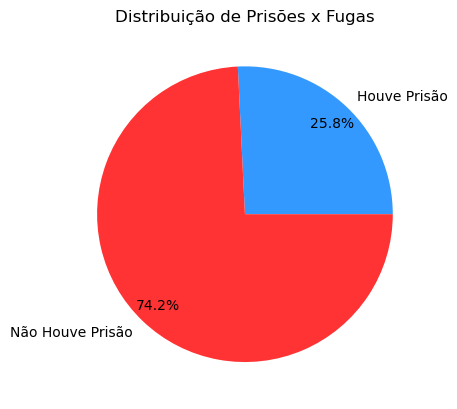

In [6]:
arrested_or_not = df['Arrest']

total = arrested_or_not.count()

arrested = arrested_or_not.loc[arrested_or_not == True].count() / total
not_arrested = arrested_or_not.loc[arrested_or_not == False].count() / total

arrested_distribution = [arrested, not_arrested]

label = ['Houve Prisão','Não Houve Prisão']

colors = ['#3399FF', '#ff3333']

plt.pie(arrested_distribution, colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85)

plt.title('Distribuição de Prisões x Fugas')

plt.show()

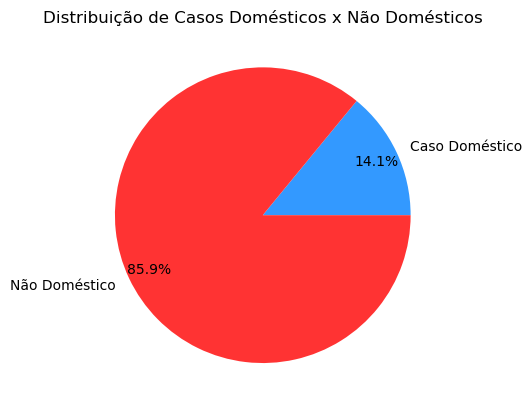

In [7]:
domestic_or_not = df['Domestic']

total = domestic_or_not.count()

domestic = domestic_or_not.loc[domestic_or_not == True].count() / total
not_domestic = domestic_or_not.loc[domestic_or_not == False].count() / total

domestic_distribution = [domestic, not_domestic]

label = ['Caso Doméstico','Não Doméstico']

colors = ['#3399FF', '#ff3333']

plt.pie(domestic_distribution, colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85)

plt.title('Distribuição de Casos Domésticos x Não Domésticos')

plt.show()

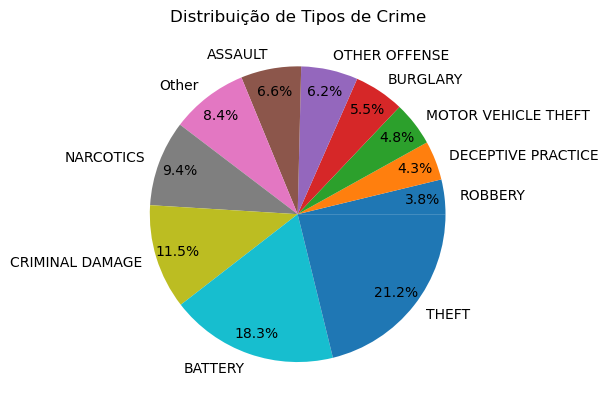

In [8]:
types = df['Primary Type']

total = types.count()

frequencies_and_labels = dict()

for crime_type in types.unique():
        freq = types.loc[types == crime_type].count() / total
        if (freq < 0.03):
            if 'Other' in frequencies_and_labels.keys():
                frequencies_and_labels['Other'] += freq
            else:
                frequencies_and_labels['Other'] = freq
                
        else:
            frequencies_and_labels[crime_type] = freq
            
            
frequencies_and_labels_sorted = dict(sorted(frequencies_and_labels.items(), key=lambda item: item[1]))
        
plt.pie(frequencies_and_labels_sorted.values(), labels=frequencies_and_labels_sorted.keys(), autopct='%1.1f%%', pctdistance=0.85)

plt.title('Distribuição de Tipos de Crime')

plt.show()

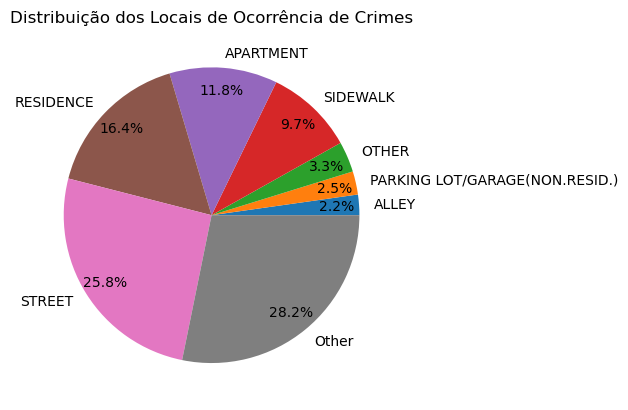

In [9]:
places = df['Location Description']

total = places.count()

frequencies_and_labels = dict()

for place in places.unique():
        freq = places.loc[places == place].count() / total
        if (freq < 0.02):
            if 'Other' in frequencies_and_labels.keys():
                frequencies_and_labels['Other'] += freq
            else:
                frequencies_and_labels['Other'] = freq
                
        else:
            frequencies_and_labels[place] = freq
            
            
        
frequencies_and_labels_sorted = dict(sorted(frequencies_and_labels.items(), key=lambda item: item[1]))
        
plt.pie(frequencies_and_labels_sorted.values(), labels=frequencies_and_labels_sorted.keys(), autopct='%1.1f%%', pctdistance=0.85)

plt.title('Distribuição dos Locais de Ocorrência de Crimes')

plt.show()

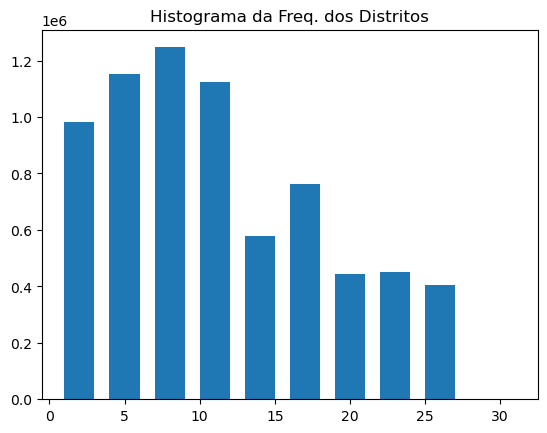

In [10]:
plt.hist(df['District'], width=2)

plt.title('Histograma da Freq. dos Distritos')

plt.show()

Preso: 7.000000000000001%; Não Preso: 93.0%; Crime: CRIMINAL DAMAGE;

Preso: 65.0%; Não Preso: 35.0%; Crime: PUBLIC PEACE VIOLATION;

Preso: 22.0%; Não Preso: 78.0%; Crime: BATTERY;

Preso: 99.0%; Não Preso: 1.0%; Crime: LIQUOR LAW VIOLATION;

Preso: 6.0%; Não Preso: 94.0%; Crime: BURGLARY;

Preso: 11.0%; Não Preso: 89.0%; Crime: THEFT;

Preso: 69.0%; Não Preso: 31.0%; Crime: CRIMINAL TRESPASS;

Preso: 73.0%; Não Preso: 27.0%; Crime: WEAPONS VIOLATION;

Preso: 18.0%; Não Preso: 82.0%; Crime: OTHER OFFENSE;

Preso: 9.0%; Não Preso: 91.0%; Crime: ROBBERY;

Preso: 27.0%; Não Preso: 73.0%; Crime: SEX OFFENSE;

Preso: 8.0%; Não Preso: 92.0%; Crime: MOTOR VEHICLE THEFT;

Preso: 21.0%; Não Preso: 79.0%; Crime: ASSAULT;

Preso: 99.0%; Não Preso: 1.0%; Crime: NARCOTICS;

Preso: 13.0%; Não Preso: 87.0%; Crime: DECEPTIVE PRACTICE;

Preso: 15.0%; Não Preso: 85.0%; Crime: CRIM SEXUAL ASSAULT;

Preso: 79.0%; Não Preso: 21.0%; Crime: OBSCENITY;

Preso: 19.0%; Não Preso: 81.0%; Crime: OFFENSE INVOLVIN

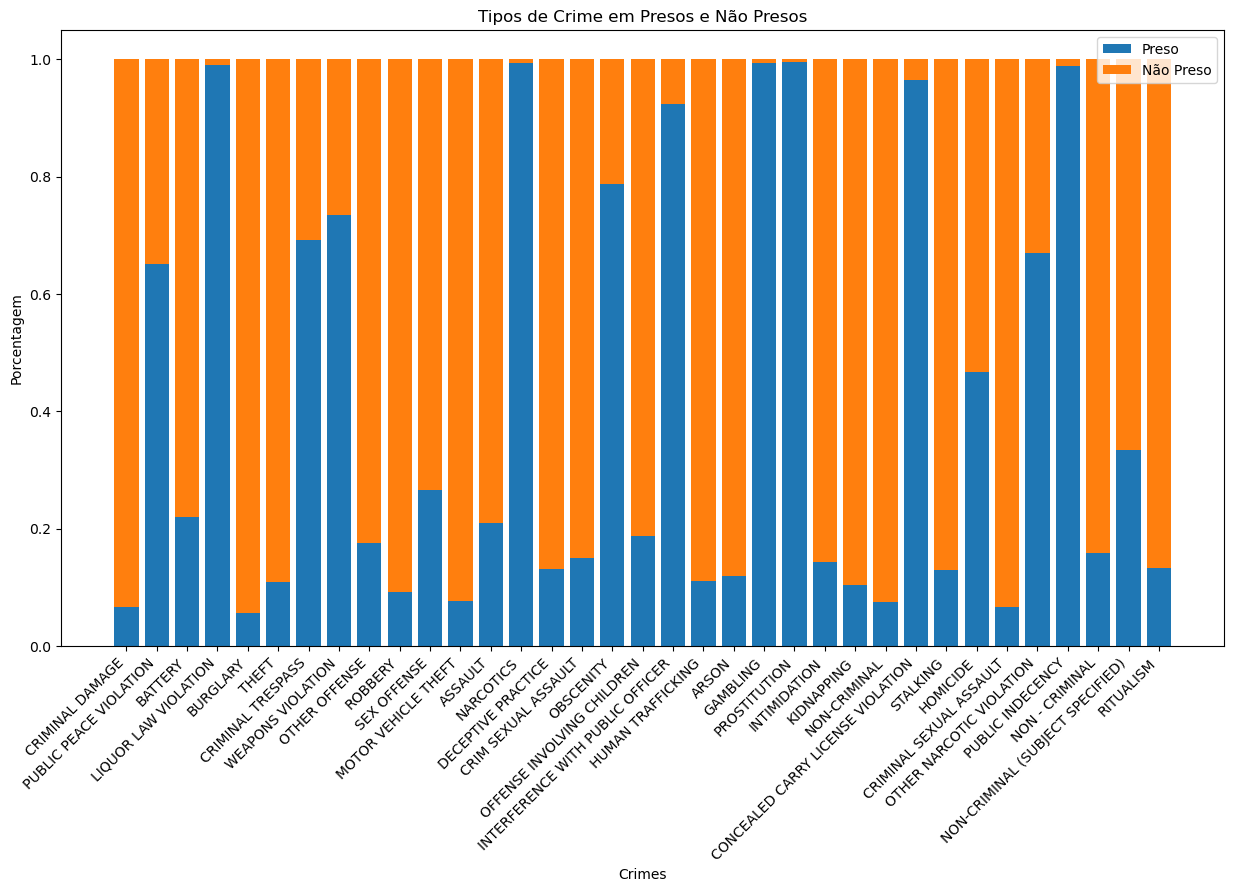

In [11]:
types = df['Primary Type']

arrests = list()
not_arrests = list()

for crime_type in types.unique():
    arrested = (df.loc[(df['Arrest'] == True) & (df['Primary Type'] == crime_type)].Arrest.shape[0]) / \
    (df.loc[df['Primary Type'] == crime_type].shape[0])
    not_arrested = (df.loc[(df['Arrest'] == False) & (df['Primary Type'] == crime_type)].Arrest.shape[0]) / \
    (df.loc[df['Primary Type'] == crime_type].shape[0])
    arrests.append(arrested)
    not_arrests.append(not_arrested)
    print(f"Preso: {100*round(arrested, 2)}%; Não Preso: {100*round(not_arrested, 2)}%; Crime: {crime_type};\n")
    
fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(types.unique(), arrests, label='Preso')
ax.bar(types.unique(), not_arrests, bottom=arrests, label='Não Preso')

ax.set_xticklabels(types.unique(), rotation=45, ha='right')

ax.set_xlabel('Crimes')
ax.set_ylabel('Porcentagem')
ax.set_title('Tipos de Crime em Presos e Não Presos')

ax.legend()

plt.show()

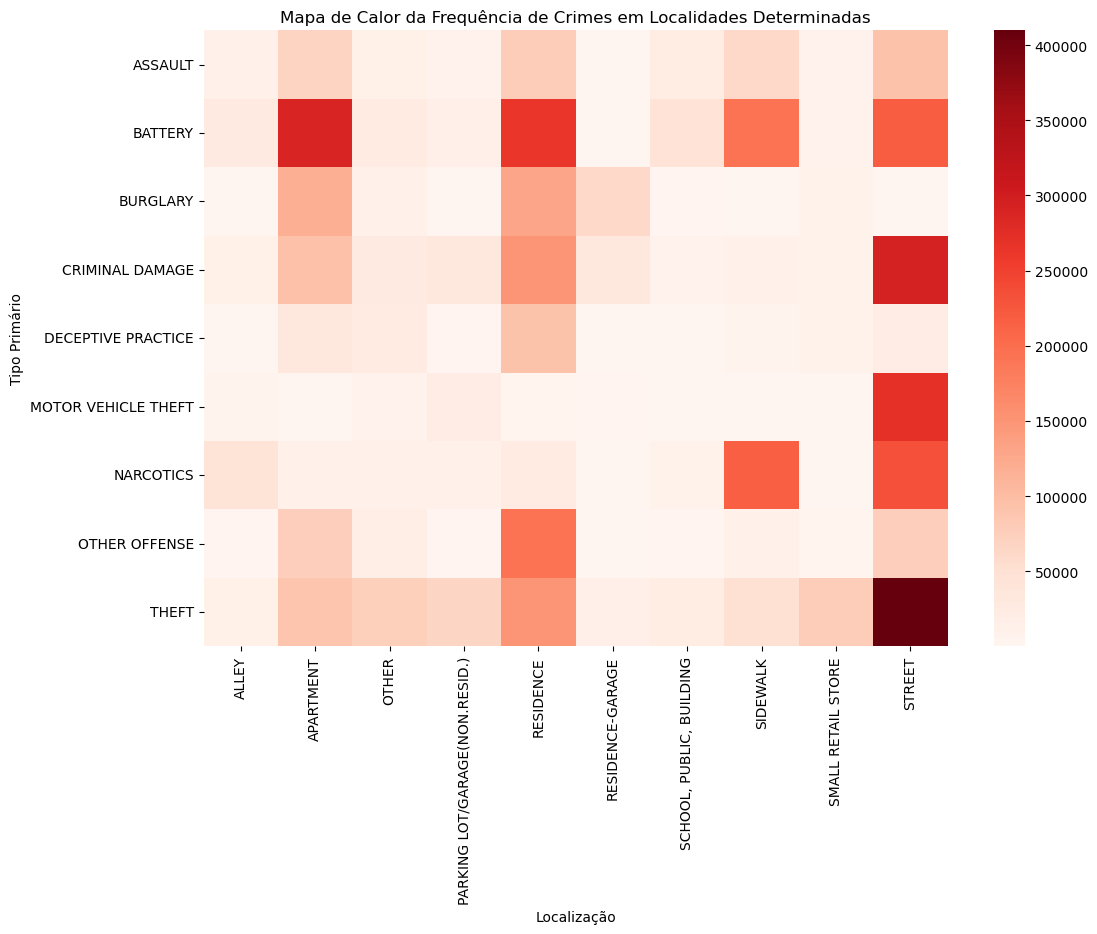

In [26]:
#-Heatmap das frequências de cada tipo de crime primário

types = df['Primary Type']

total = types.count()

frequencies_and_labels = dict()

for crime_type in types.unique():
        freq = types.loc[types == crime_type].count() / total
        if (freq < 0.03):
            if 'Other' in frequencies_and_labels.keys():
                frequencies_and_labels['Other'] += freq
            else:
                frequencies_and_labels['Other'] = freq
                
        else:
            frequencies_and_labels[crime_type] = freq
            
            
        
frequencies_and_labels_sorted = dict(sorted(frequencies_and_labels.items(), key=lambda item: item[1], reverse=True))

top_10_types = list(frequencies_and_labels_sorted.keys())[:10]

# Selecting the top 10 location descriptions
top_10_locations = df['Location Description'].value_counts().head(10).index

# Creating a DataFrame with only the top 10 crime types and top 10 location descriptions
df_top_10 = df[df['Primary Type'].isin(top_10_types) & df['Location Description'].isin(top_10_locations)]

# Creating a heatmap using seaborn
plt.figure(figsize=(12, 8))
heatmap_data = df_top_10.pivot_table(index='Primary Type', columns='Location Description', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='Reds', annot=False, fmt='g')
plt.title('Mapa de Calor da Frequência de Crimes em Localidades Determinadas')
plt.xlabel('Localização')
plt.ylabel('Tipo Primário')
plt.show()

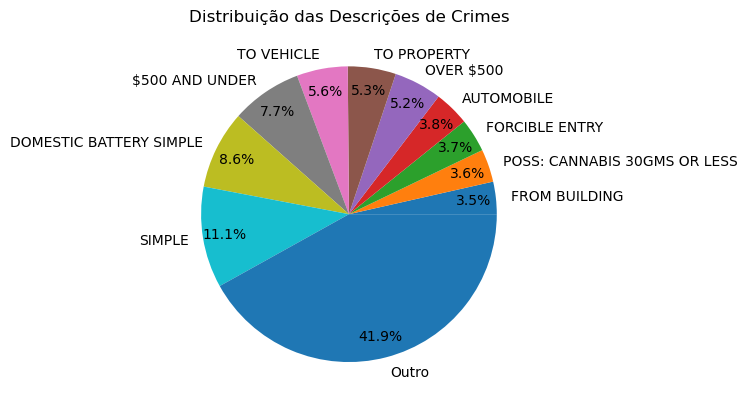

In [27]:
descriptions = df['Description']

total = descriptions.count()

frequencies_and_labels = dict()

for crime_desc in descriptions.unique():
        freq = descriptions.loc[descriptions == crime_desc].count() / total
        if (freq < 0.03):
            if 'Outro' in frequencies_and_labels.keys():
                frequencies_and_labels['Outro'] += freq
            else:
                frequencies_and_labels['Outro'] = freq
                
        else:
            frequencies_and_labels[crime_desc] = freq
            
            
        
frequencies_and_labels_sorted = dict(sorted(frequencies_and_labels.items(), key=lambda item: item[1]))
        
plt.pie(frequencies_and_labels_sorted.values(), labels=frequencies_and_labels_sorted.keys(), autopct='%1.1f%%', pctdistance=0.85)

plt.title('Distribuição das Descrições de Crimes')

plt.show()

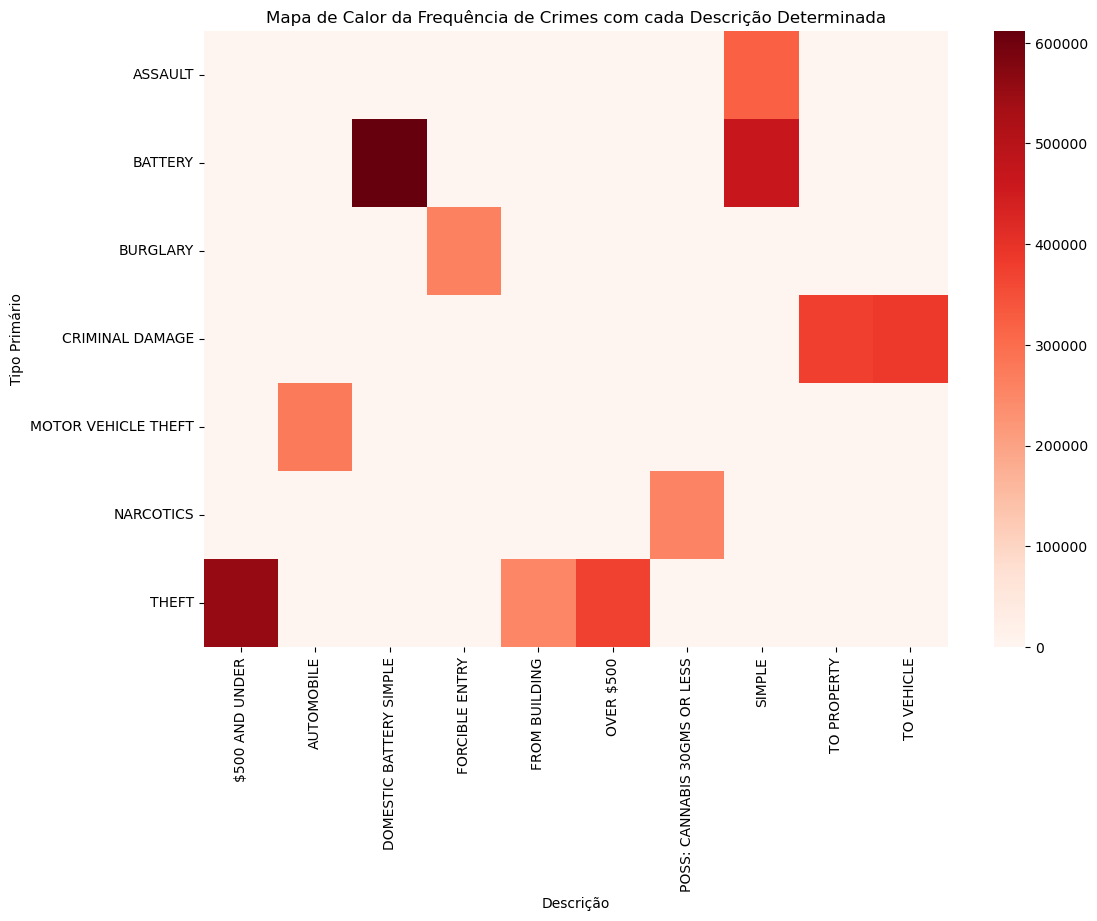

In [31]:
types = df['Primary Type']

total = types.count()

frequencies_and_labels = dict()

for crime_type in types.unique():
        freq = types.loc[types == crime_type].count() / total
        if (freq < 0.03):
            if 'Other' in frequencies_and_labels.keys():
                frequencies_and_labels['Other'] += freq
            else:
                frequencies_and_labels['Other'] = freq
                
        else:
            frequencies_and_labels[crime_type] = freq
            
            
        
frequencies_and_labels_sorted = dict(sorted(frequencies_and_labels.items(), key=lambda item: item[1], reverse=True))

top_10_types = list(frequencies_and_labels_sorted.keys())[:10]

# Selecting the top 10 descriptions
top_10_descriptions = df['Description'].value_counts().head(10).index

# Creating a DataFrame with only the top 10 crime types and top 10 location descriptions
df_top_10 = df[df['Primary Type'].isin(top_10_types) & df['Description'].isin(top_10_descriptions)]

# Creating a heatmap using seaborn
plt.figure(figsize=(12, 8))
heatmap_data = df_top_10.pivot_table(index='Primary Type', columns='Description', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='Reds', annot=False, fmt='g')
plt.title('Mapa de Calor da Frequência de Crimes com cada Descrição Determinada')
plt.xlabel('Descrição')
plt.ylabel('Tipo Primário')
plt.show()

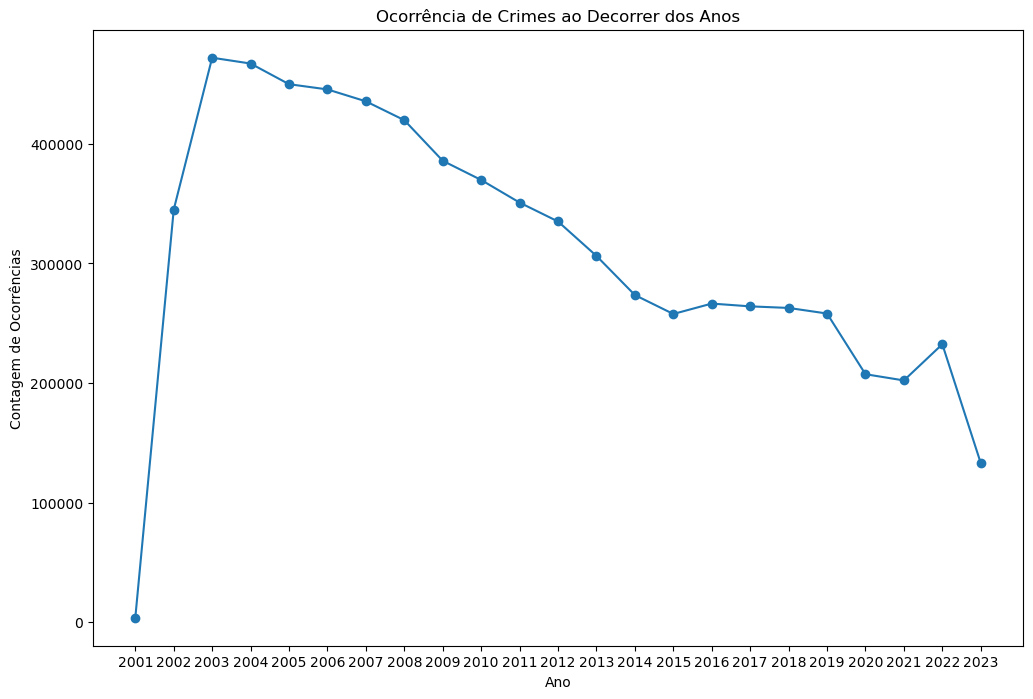

In [43]:
# Criando um gráfico de linha temporal para exibir o número de crimes ocorridos num determinado ano

crimes_per_year = df.groupby('Year')['Primary Type'].count().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(crimes_per_year['Year'], crimes_per_year['Primary Type'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Ano')
plt.ylabel('Contagem de Ocorrências')
plt.title('Ocorrência de Crimes ao Decorrer dos Anos')
plt.xticks(crimes_per_year['Year'])

# Display the chart
plt.show()

In [44]:
crimes_per_year

,Year,Primary Type
0,2001,3888
1,2002,345026
2,2003,471995
3,2004,467132
4,2005,449868
5,2006,445500
6,2007,435532
7,2008,419794
8,2009,385849
9,2010,369806
